In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Ex.1 (Q4): Bootstrap

Bootstrapping is a prominent statistical technique to estimate errors when you're stuck and don't know what else to do.

Generate a 1D array (say from a Gaussian, but then add some outliers for fun). Compute the bootstrapped 95% confidence intervals for the mean of that array (i.e., resample the elements of an array with replacement N times, compute the mean of each sample, and then compute percentiles over the means).

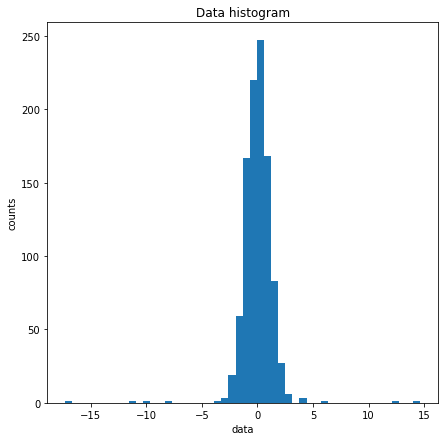

In [2]:
distr = np.random.normal(0,1,1000)  # main distribution
outliers = np.random.normal(0,10,10) # outliers

data = np.concatenate((distr,outliers)) # concatenate the two arrays

np.random.shuffle(data) # shuffle the data array

fig = plt.figure(figsize=(7,7))

plt.hist(data,bins=50)
plt.xlabel('data')
plt.ylabel('counts')
plt.title('Data histogram')
plt.show()

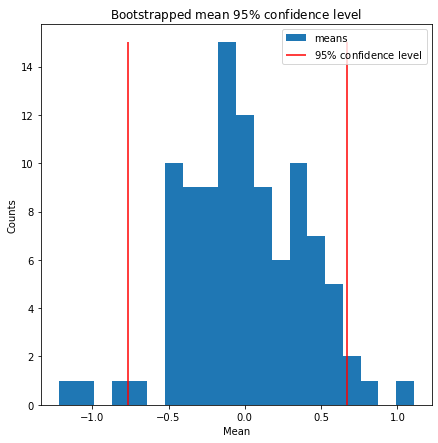

In [3]:
N_bs = 100
bs_sample = 10

mean = np.zeros(N_bs)

for n in range(N_bs):
    resample = np.random.choice(data,bs_sample,replace=True)
    mean[n] = np.mean(resample)

perc_2_5 = np.percentile(mean,2.5)
perc_97_5 = np.percentile(mean,97.5)

# plot
fig = plt.figure(figsize=(7,7))

mean_hist = plt.hist(mean,bins=20,label='means')
plt.vlines(perc_2_5,0,max(mean_hist[0]),color='red',label=r'$95\%$ confidence level')
plt.vlines(perc_97_5,0,max(mean_hist[0]),color='red')
plt.title(r'Bootstrapped mean $95\%$ confidence level')
plt.xlabel('Mean')
plt.ylabel('Counts')
plt.legend()

# Ex. 2 (Q3): Standard deviation

Numpy of course has a standard deviation function, np.std(), but here we'll write our own that works on a 1-d array (vector). The standard deviation is a measure of the "width" of the distribution of numbers in the vector.

Given an array, and an average, the standard deviation is:

$$ \sigma = \Bigl[ \frac{1}{N} \sum_{i=1}^N(a_i - \bar{a})^2 \Bigr]^{1/2}$$

Write a function to calculate the standard deviation for an input array, a:

* First compute the average of the elements in a to define 
* Next compute the sum over the squares of 
* Then divide the sum by the number of elements in the array
* Finally take the square root (you can use np.sqrt())

Test your function on a random array, and compare to the built-in np.std(). Check the runtime as well.

In [17]:
def compute_std(x):
    
    # compute the avg
    tot_sum = 0
    
    for i in range(len(x)):
        tot_sum += x[i]
        
    avg = tot_sum/len(x)
    
    # compute std:
    squared_res = 0
    for i in range(len(x)):
        squared_res += (x[i]-avg)**2
        
    var = squared_res/len(x)
    std = np.sqrt(var)
    
    return std

In [18]:
import time

In [27]:
# test my function
time0 = time.time()
my_std = compute_std(data)
time1 = time.time()
my_deltaT = time1-time0

print('Computed std from function: %.3f in %.9f s'%(my_std,my_deltaT))

# test np.std
time2 = time.time()
np_std = np.std(data)
time3 = time.time()
np_deltaT = time3-time2

print('Computed std from numpy: %.3f in %.9f s'%(np_std,np_deltaT))

Computed std from function: 1.419 in 0.002042770 s
Computed std from numpy: 1.419 in 0.000211954 s
